### 作业 5：图像数据的数组表示与操作（选做）

#### 要求

1. **数据初始化与维度变换**：
   - 首先，通过 `numpy.random.randint(0， 256， size=(200， 300))` 创建一个二维数组，用以模拟一个 `200x300` 像素的灰度图像 `grayscale_image`。
   - 随后，将此二维灰度图像转换为一个 `(200， 300， 3)` 的三维 RGB 图像 `color_image`，要求 R、G、B 三个通道的数值与原始灰度值完全相同。
   - **提示**：可使用 `numpy.stack` 或其他维度扩展技术。

2. **基于矩阵乘法的滤镜实现**：
   - 为 `color_image` 实现一个「复古色（Sepia）」滤镜。该滤镜通过对每个像素的 `[R， G， B]` 向量应用一次线性变换实现。变换矩阵如下：

     ```python
     sepia_matrix = np.array([
         [0.393， 0.769， 0.189]，
         [0.349， 0.686， 0.168]，
         [0.272， 0.534， 0.131]
     ])
     ```

   - **核心要求**：必须使用 NumPy 的矩阵乘法（`@` 或 `numpy.dot`）来完成对整个图像的变换，严禁使用循环遍历像素。
   - 计算结果可能会超出 `[0， 255]` 范围，需使用 `numpy.clip` 函数进行截断。

3. **基于元素级运算的色彩增强**：
   - 实现一个简化的「过饱和」效果。其算法步骤如下：
     1. 根据公式 `L = 0.299*R + 0.587*G + 0.114*B` 计算图像每个像素的亮度 `L`（Luminance）。
     2. 对于每个颜色通道 `C`（C 为 R、G 或 B），应用饱和度增强公式 `C_new = L + alpha * (C_old - L)`，其中 `alpha` 为饱和度因子（例如，取 `1.5`）。
   - **核心要求**：整个过程必须是向量化的元素级运算。
   - 同样，对最终结果进行 `[0， 255]` 的截断。

4. **利用数组切片添加特效**：
   - 为原始的 `color_image` 添加一个宽度为 20 像素的水平渐变边框。
   - 左侧 20 像素的边框应从纯黑（值 = 0）线性渐变到图像的原始像素值。
   - 右侧 20 像素的边框应从图像的原始像素值线性渐变到纯白（值 = 255）。
   - **提示**：`numpy.linspace` 可用于生成渐变序列。

#### 任务 1 数据初始化与维度变换

(np.float64(-0.5), np.float64(299.5), np.float64(199.5), np.float64(-0.5))

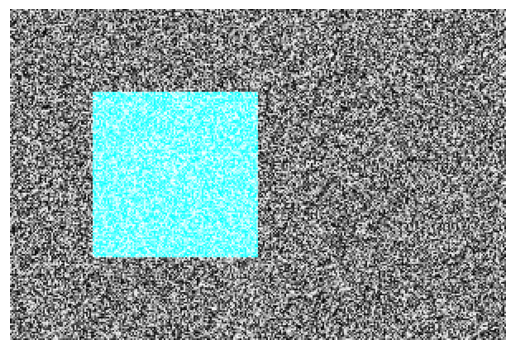

In [5]:
import numpy as np
import matplotlib.pyplot as plt

grayscale_image = np.random.randint(0, 256, size = (200, 300), dtype=np.uint8)
color_image = np.stack((grayscale_image,grayscale_image,grayscale_image), axis = 2)

#如果三个通道值都一样的话，图片还是灰的，所以这里稍微改一下
color_image[50:150, 50:150, [1,2]] = 255

plt.imshow(color_image)
plt.axis('off')


#### 任务 2 基于矩阵乘法的滤镜实现

(np.float64(-0.5), np.float64(299.5), np.float64(199.5), np.float64(-0.5))

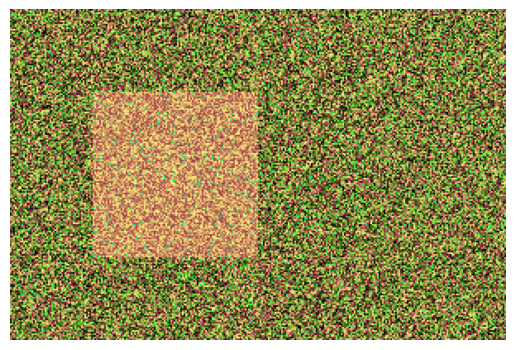

In [6]:
sepia_matrix = np.array([
         [0.393, 0.769, 0.189],
         [0.349, 0.686, 0.168],
         [0.272, 0.534, 0.131]
     ])

color_image = np.dot(color_image, sepia_matrix).astype(np.uint8)
color_image = np.clip(color_image,0,255) #类型改为uint8范围就被限制了

plt.imshow(color_image)
plt.axis('off')

+ 复古滤镜是长这样的吗，总觉得有点奇怪，可能数据类型和颜色映射没处理好，不过整体是变绿应该差不多了。

#### 任务 3 基于元素级运算的色彩增强

(np.float64(-0.5), np.float64(299.5), np.float64(199.5), np.float64(-0.5))

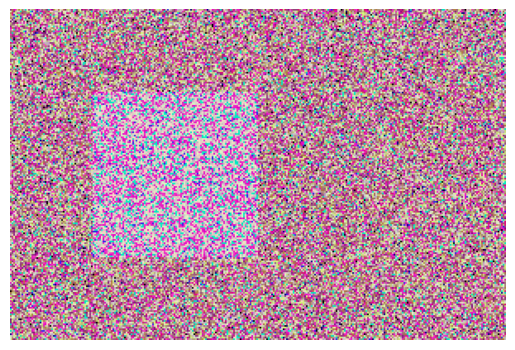

In [7]:
luminance_matrix = np.array([[0.299], [0.587], [0.114]])

luminance_image = np.dot(color_image, luminance_matrix).astype(np.uint8)
luminance_image = np.concatenate((luminance_image,luminance_image,luminance_image), axis=2)

alpha = 1.5

color_image = (luminance_image + alpha * (color_image - luminance_image)).astype(np.uint8)
color_image = np.clip(color_image,0,255) #类型改为uint8范围就被限制了

plt.imshow(color_image)
plt.axis('off')

+ 色彩增强是长这样的吗，越来越奇怪了，虽然颜色是变鲜明了没错。

#### 任务 4 利用数组切片添加特效

(np.float64(-0.5), np.float64(339.5), np.float64(239.5), np.float64(-0.5))

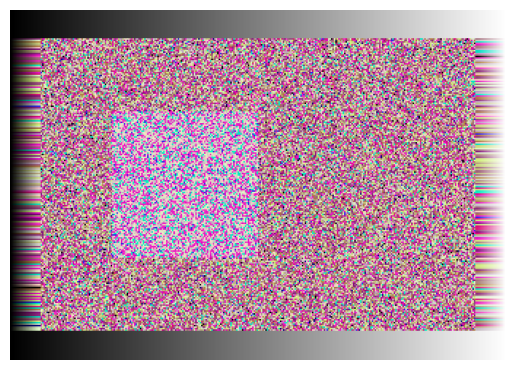

In [8]:
left_image = np.zeros((200, 3), dtype = np.uint8)
left_image = np.linspace(left_image, color_image[:, 0], 20, axis = 1).astype(np.uint8)

right_image = np.zeros((200, 3), dtype = np.uint8) + 255
right_image = np.linspace(color_image[:, 299], right_image, 20, axis = 1).astype(np.uint8)

color_image = np.concatenate((left_image, color_image, right_image),axis = 1).astype(np.uint8)

top_image = np.zeros((20,3), dtype = np.uint8)
top_image = np.linspace(top_image, top_image + 255, 340, axis = 1).astype(np.uint8)

color_image = np.concatenate((top_image, color_image, top_image), axis = 0).astype(np.uint8)

plt.imshow(color_image)
plt.axis('off')